## British Airways Forage Task
### Author: SINU S MARIAM
#### Problem Statement:

* Use webscrapping to get data about british airways for data analysis from www.airlinequality.com
* Build a predictive model to find the factors influencing customer buying behaviour

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [91]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [115]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Good domestic flight operat...
1,Not Verified | Failed at all basic travel fund...
2,✅ Trip Verified | They lost my baggage in a v...
3,✅ Trip Verified | Late boarding led to a one ...
4,✅ Trip Verified | As usual the flight is delay...


In [116]:
len(df)

1000

The loops above collected 1000 reviews by iterating through the paginated pages on the website.
Next thing that we need to do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

### Data Cleaning

The function clean_string below removes all non-alphanumeric characters except empty string, ! , - , : , and ,

In [117]:

import re

def clean_string(s):
    return re.sub(r'[^A-Za-z0-9 !-:,]', ' ', s)

# Test the function
test_str = "This is a test string! With some, non:alphanumeric - characters*"
print(clean_string(test_str))



This is a test string! With some, non:alphanumeric - characters*


In [118]:
df['reviews'] = df['reviews'].apply(clean_string)

In [119]:
df

,reviews
0,Trip Verified Good domestic flight operat...
1,Not Verified Failed at all basic travel fund...
2,Trip Verified They lost my baggage in a v...
3,Trip Verified Late boarding led to a one ...
4,Trip Verified As usual the flight is delay...
...,...
995,Trip Verified Miami to London Heathrow. A...
996,Not Verified London Heathrow to Milan Malpen...
997,Not Verified Calgary to Rome via London. My...
998,Trip Verified London to Bangkok. Flew Bri...


The function trim_string below trims off the string and makes it start after the word 'VERIFIED' and stop at num_words

In [120]:
def trim_string(input_str, sub_str, num_words=50):
    # Find the start of the substring
    start = input_str.find(sub_str)
    sub_len = len(sub_str)
    start += sub_len
    
    # If substring is not found, return the original string
    if start == -1:
        return input_str

    # Get the substring starting from the first occurrence of the substring
    sub_str_start = input_str[start:]
    #sub_str_start = sub_str_start.lstrip()

    # Split the substring into words
    words = sub_str_start.split()

    # If there are more than 'num_words' words, keep only 'num_words' words
    if len(words) > num_words:
        words = words[:num_words]

    # Join the words back into a string and return
    return ' '.join(words)

# Test the function
input_str = 'This is a test string. The function should start from the word "The" and return the first 50 words.'
sub_str = 'The'

print(trim_string(input_str, sub_str))


function should start from the word "The" and return the first 50 words.


In [121]:
df_backup = df

### Natural Language Processing (NLP) techniques to preprocess the text

In [122]:
words = [trim_string(df.iat[i,0].lstrip(), 'Verified', len(df.iat[i,0])) for i in range(1000)]
df = pd.DataFrame(words, columns = ['reviews'])

In [123]:
df.iat[0,0]

'Good domestic flight operated by BA Cityflyer. Ground service at check-in Edinburgh airport was particularly friendly and helpful. The flight departed on time and arrived earlier than scheduled. A complimentary drink and snack (albeit tiny!) were served. Generally it seems that the quality of the Cityflyer subsidiary is superior to the mainline British Airways flights.'

In [124]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Function to perform text preprocessing
def preprocess_text(doc):
    # Lowercasing
    doc = doc.lower()
    
    # Tokenization
    tokens = word_tokenize(doc)
    
    # Stopword Removal and only keep text data then Lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalpha()]
    
    return tokens

# Apply the preprocessing to each review
df['processed_review'] = df['reviews'].apply(preprocess_text)

df.head()


,reviews,processed_review
0,Good domestic flight operated by BA Cityflyer....,"[good, domestic, flight, operated, ba, cityfly..."
1,Failed at all basic travel fundamentals: 1) Ou...,"[failed, basic, travel, fundamental, flight, d..."
2,They lost my baggage in a very simple situatio...,"[lost, baggage, simple, situation, three, week..."
3,Late boarding led to a one hour flight leaving...,"[late, boarding, led, one, hour, flight, leavi..."
4,As usual the flight is delayed. BA try to blam...,"[usual, flight, delayed, ba, try, blame, someo..."


### Dropping the reviews column

In [125]:
tdf = df.drop('reviews', axis = 1)

In [126]:
tdf.head()

,processed_review
0,"[good, domestic, flight, operated, ba, cityfly..."
1,"[failed, basic, travel, fundamental, flight, d..."
2,"[lost, baggage, simple, situation, three, week..."
3,"[late, boarding, led, one, hour, flight, leavi..."
4,"[usual, flight, delayed, ba, try, blame, someo..."


In [127]:
# Define a list of strings
def convert_to_single_string(list_of_strings):
    
    # Convert the list to a single string, with each element separated by a space
    single_string = ' '.join(list_of_strings)

    single_string
    
    return single_string

In [128]:
tdf['processed_reviews'] = tdf['processed_review'].apply(convert_to_single_string)

In [129]:
tdf = tdf.drop('processed_review', axis = 1)

In [130]:
tdf

,processed_reviews
0,good domestic flight operated ba cityflyer gro...
1,failed basic travel fundamental flight delayed...
2,lost baggage simple situation three week care ...
3,late boarding led one hour flight leaving two ...
4,usual flight delayed ba try blame someone inab...
...,...
995,miami london heathrow many others posted revie...
996,london heathrow milan malpensa worst airline e...
997,calgary rome via london wife booked anniversar...
998,london bangkok flew british airway first time ...


### Creating Word Cloud

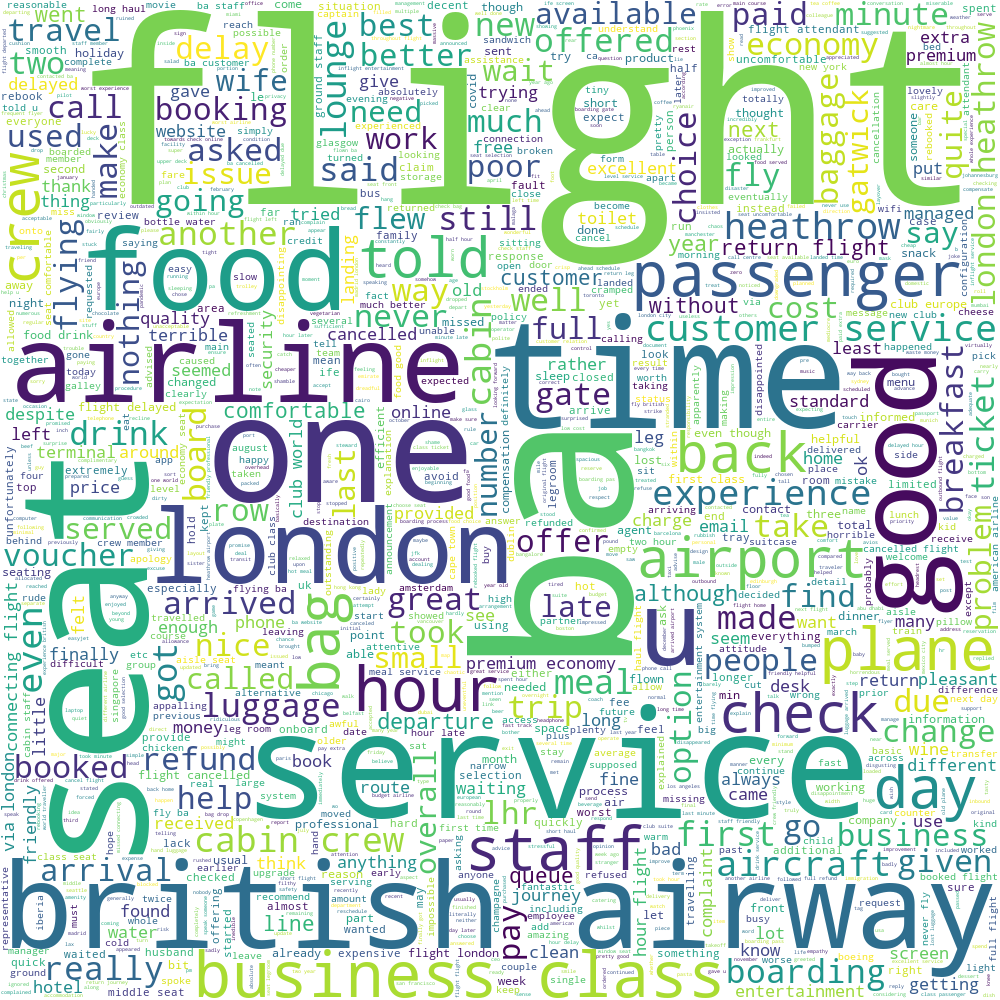

In [131]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(tdf['processed_reviews'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', width = 1000, height = 1000)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

### Save to disk

## SENTIMENT ANALYSIS

In [132]:
df = df_backup

In [134]:
words = [trim_string(df.iat[i,0].lstrip(), 'Verified', len(df.iat[i,0])) for i in range(1000)]
df = pd.DataFrame(words, columns = ['reviews'])

In [135]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Function to perform text preprocessing
def preprocess_text(doc):
    # Lowercasing
    doc = doc.lower()
    
    # Tokenization
    tokens = word_tokenize(doc)
    
    # Stopword Removal and only keep text data then Lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalpha()]
    
    return tokens

# Apply the preprocessing to each review
df['normalized_review'] = df['reviews'].apply(preprocess_text)

df.head()


,reviews,normalized_review
0,Good domestic flight operated by BA Cityflyer....,"[good, domestic, flight, operated, ba, cityfly..."
1,Failed at all basic travel fundamentals: 1) Ou...,"[failed, basic, travel, fundamental, flight, d..."
2,They lost my baggage in a very simple situatio...,"[lost, baggage, simple, situation, three, week..."
3,Late boarding led to a one hour flight leaving...,"[late, boarding, led, one, hour, flight, leavi..."
4,As usual the flight is delayed. BA try to blam...,"[usual, flight, delayed, ba, try, blame, someo..."


In [136]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the 'normalized_review' column and transform the data
doc_word = vectorizer.fit_transform(df['normalized_review'].apply(lambda x: ' '.join(x)))

# X is now a matrix with one row per document and one column per word in the corpus.
# Each cell in the matrix will contain the TF-IDF value of the word in the document.

# Convert to a regular array
doc_word = doc_word.toarray()

# Create a DataFrame
doc_word_df = pd.DataFrame(doc_word, columns=vectorizer.get_feature_names_out())

doc_word_df.head()


,aa,abandon,abandoned,aberdeen,ability,able,abnormally,aboard,abreakfast,abreast,...,yvr,zealand,zero,zip,zone,zoo,zuletzt,zum,zurich,zusammenschluss
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Model Training using NLTK Vader_Lexicon

In [137]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download the vader_lexicon
nltk.download('vader_lexicon')

# Initialize the VADER sentiment intensity analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to calculate sentiment from text
def calculate_sentiment(text):
    # Calculate sentiment scores
    sentiment_scores = sia.polarity_scores(text)
    
    # Return the compound score
    return sentiment_scores['compound']

# Apply the function to the 'normalized_review' column
df['sentiment_score'] = df['normalized_review'].apply(lambda x: ' '.join(x)).apply(calculate_sentiment)



[nltk_data] Downloading package vader_lexicon to C:\ProgramData\anacon
[nltk_data]     da3\envs\MA336_environment\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [138]:
print(df.head(2))

                                             reviews  \
0  Good domestic flight operated by BA Cityflyer....   
1  Failed at all basic travel fundamentals: 1) Ou...   

                                   normalized_review  sentiment_score  
0  [good, domestic, flight, operated, ba, cityfly...           0.9420  
1  [failed, basic, travel, fundamental, flight, d...          -0.9019  


### Labelling the data using sentiment_score

In [139]:
def sentiment_label(sentiment_score):
    if sentiment_score > 0.5:
        sentiment = 'positive'
    
    elif sentiment_score < 0.5:
        sentiment = 'negative'
        
    else:
        sentiment = 'neutral'
        
    return sentiment

In [140]:
df['sentiment'] = df['sentiment_score'].apply(sentiment_label)

In [141]:
df.head()

,reviews,normalized_review,sentiment_score,sentiment
0,Good domestic flight operated by BA Cityflyer....,"[good, domestic, flight, operated, ba, cityfly...",0.9420,positive
1,Failed at all basic travel fundamentals: 1) Ou...,"[failed, basic, travel, fundamental, flight, d...",-0.9019,negative
2,They lost my baggage in a very simple situatio...,"[lost, baggage, simple, situation, three, week...",0.5267,positive
3,Late boarding led to a one hour flight leaving...,"[late, boarding, led, one, hour, flight, leavi...",-0.5994,negative
4,As usual the flight is delayed. BA try to blam...,"[usual, flight, delayed, ba, try, blame, someo...",-0.7579,negative


In [142]:
sentimentCount_df = df.drop(['reviews', 'normalized_review', 'sentiment_score'], axis = 1)

In [143]:
for column in sentimentCount_df.columns:
    print("\n" + column)
    print(sentimentCount_df[column].value_counts())


sentiment
negative    511
positive    489
Name: sentiment, dtype: int64


### Model Training using Textblob

TextBlob’s sentiment function returns tuple, polarity, and subjectivity and the polarity score floats within the range of -1.0 & 1.0 where anything greater than 0 is positive and below 0 is negative.

In [144]:
df2 = df

In [145]:
df2

,reviews,normalized_review,sentiment_score,sentiment
0,Good domestic flight operated by BA Cityflyer....,"[good, domestic, flight, operated, ba, cityfly...",0.9420,positive
1,Failed at all basic travel fundamentals: 1) Ou...,"[failed, basic, travel, fundamental, flight, d...",-0.9019,negative
2,They lost my baggage in a very simple situatio...,"[lost, baggage, simple, situation, three, week...",0.5267,positive
3,Late boarding led to a one hour flight leaving...,"[late, boarding, led, one, hour, flight, leavi...",-0.5994,negative
4,As usual the flight is delayed. BA try to blam...,"[usual, flight, delayed, ba, try, blame, someo...",-0.7579,negative
...,...,...,...,...
995,Miami to London Heathrow. As with many others ...,"[miami, london, heathrow, many, others, posted...",0.9012,positive
996,London Heathrow to Milan Malpensa. Worst airli...,"[london, heathrow, milan, malpensa, worst, air...",-0.7981,negative
997,Calgary to Rome via London. My wife and I book...,"[calgary, rome, via, london, wife, booked, ann...",0.9817,positive
998,London to Bangkok. Flew British Airways for th...,"[london, bangkok, flew, british, airway, first...",0.8629,positive


In [146]:
from textblob import TextBlob

# Get the polarity score using below function
def get_textBlob_score(sent):
    # This polarity score is between -1 to 1
    
    polarity = TextBlob(sent).sentiment.polarity
    
    return polarity

In [147]:
# Apply the function to the 'normalized_review' column
df2['sentiment_score'] = df2['normalized_review'].apply(lambda x: ' '.join(x)).apply(get_textBlob_score)

print(df2.head())

                                             reviews  \
0  Good domestic flight operated by BA Cityflyer....   
1  Failed at all basic travel fundamentals: 1) Ou...   
2  They lost my baggage in a very simple situatio...   
3  Late boarding led to a one hour flight leaving...   
4  As usual the flight is delayed. BA try to blam...   

                                   normalized_review  sentiment_score  \
0  [good, domestic, flight, operated, ba, cityfly...         0.236111   
1  [failed, basic, travel, fundamental, flight, d...        -0.265714   
2  [lost, baggage, simple, situation, three, week...         0.030000   
3  [late, boarding, led, one, hour, flight, leavi...        -0.114137   
4  [usual, flight, delayed, ba, try, blame, someo...        -0.125000   

  sentiment  
0  positive  
1  negative  
2  positive  
3  negative  
4  negative  


In [148]:
def sentimentLabel(sentiment_score):
    if sentiment_score > 0:
        sentiment = 'positive'
    
    elif sentiment_score < 0:
        sentiment = 'negative'

        
    return sentiment

In [149]:
df2['sentiment'] = df2['sentiment_score'].apply(sentiment_label)

In [150]:
sentimentCountDf = df.drop(['reviews', 'normalized_review', 'sentiment_score'], axis = 1)

In [151]:
for column in sentimentCountDf.columns:
    print("\n" + column)
    print(sentimentCountDf[column].value_counts())


sentiment
negative    975
positive     25
Name: sentiment, dtype: int64


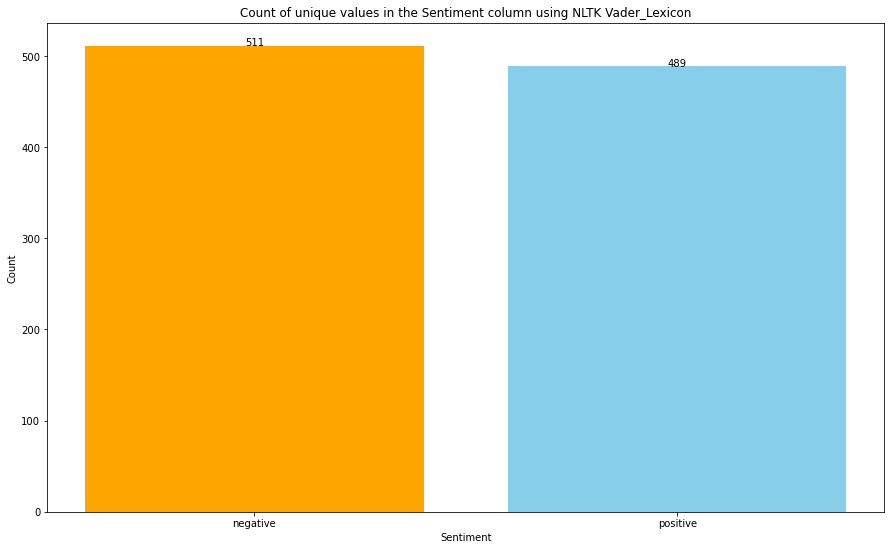

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of unique values in the 'sentiment' column
sentiment_counts = sentimentCount_df['sentiment'].value_counts()

# Generate the bar plot
plt.figure(figsize=(15,9))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['orange', 'skyblue']) # You may need to adjust the colors depending on the number of unique values

# Add value labels on top of each bar
for i in range(len(sentiment_counts.index)):
    plt.text(i, sentiment_counts.values[i], str(sentiment_counts.values[i]), ha = 'center')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of unique values in the Sentiment column using NLTK Vader_Lexicon')

# save the figure
plt.savefig('./images/sentiment_nltk.png', dpi=300, bbox_inches='tight')

# show the plot
# plt.show()


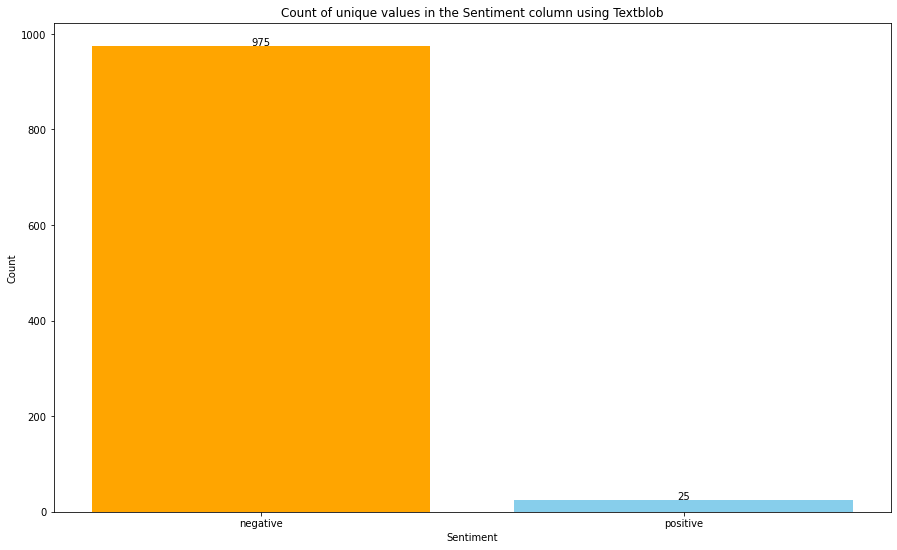

In [154]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the count of unique values in the 'sentiment' column
sentiment_counts = sentimentCountDf['sentiment'].value_counts()

# Generate the bar plot
plt.figure(figsize=(15,9))
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['orange', 'skyblue']) # You may need to adjust the colors depending on the number of unique values

# Add value labels on top of each bar
for i in range(len(sentiment_counts.index)):
    plt.text(i, sentiment_counts.values[i], str(sentiment_counts.values[i]), ha = 'center')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Count of unique values in the Sentiment column using Textblob')

# save the figure
plt.savefig('./images/sentiment_textblob.png', dpi=300, bbox_inches='tight')

# show the plot
# plt.show()

### Conlusion
The results above show that the overall sentiment towards the BA brand from the 1000 reviews was negative

## Topic Modelling

In [157]:
df = df_backup

In [159]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import string

# Function to perform text preprocessing
def preprocess_text(doc):
    # Lowercasing
    doc = doc.lower()
    
    # Tokenization
    tokens = word_tokenize(doc)
    
    # Stopword Removal and only keep text data then Lemmatization
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words and token.isalpha()]
    
    return tokens

# Apply the preprocessing to each review
df['processed_review'] = df['reviews'].apply(preprocess_text)

df.head()


,reviews,processed_review
0,Trip Verified Good domestic flight operat...,"[trip, verified, good, domestic, flight, opera..."
1,Not Verified Failed at all basic travel fund...,"[verified, failed, basic, travel, fundamental,..."
2,Trip Verified They lost my baggage in a v...,"[trip, verified, lost, baggage, simple, situat..."
3,Trip Verified Late boarding led to a one ...,"[trip, verified, late, boarding, led, one, hou..."
4,Trip Verified As usual the flight is delay...,"[trip, verified, usual, flight, delayed, ba, t..."


In [160]:
from sklearn.feature_extraction.text import CountVectorizer

# Join the processed tokens back into a string
df['processed_review_str'] = df['processed_review'].apply(' '.join)

# Initialize the count vectorizer
vectorizer = CountVectorizer()

# Fit and transform the processed titles
doc_word = vectorizer.fit_transform(df['processed_review_str'])

# Convert to a regular array
doc_word = doc_word.toarray()

# Create a DataFrame
doc_word_df = pd.DataFrame(doc_word, columns=vectorizer.get_feature_names_out())

doc_word_df.head()


,aa,abandon,abandoned,aberdeen,ability,able,abnormally,aboard,abreakfast,abreast,...,yvr,zealand,zero,zip,zone,zoo,zuletzt,zum,zurich,zusammenschluss
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [161]:
#pip install gensim

In [162]:
#pip install pyLDAvis

In [163]:
import gensim
from gensim import corpora
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(df['processed_review'])

# Convert the list of reviews (processed_review) into a Document Term Matrix using the dictionary prepared above
doc_term_matrix = [dictionary.doc2bow(review) for review in df['processed_review']]

# Create the object for LDA model
LDA = gensim.models.ldamodel.LdaModel

# Train the LDA model on the document term matrix
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=10, random_state=100,
                chunksize=1000, passes=500)

# Print the topics identified by the LDA model
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

# use the line below to save the output to disk
# pyLDAvis.save_html(vis, "C:/Users/CHARLES/Personal_Development/BA/Drafts/topicModel.html")

vis


Topic: 0 
Words: 0.039*"flight" + 0.020*"london" + 0.019*"verified" + 0.018*"trip" + 0.015*"crew" + 0.012*"heathrow" + 0.012*"time" + 0.011*"staff" + 0.010*"ba" + 0.010*"food"


Topic: 1 
Words: 0.020*"flight" + 0.018*"seat" + 0.018*"class" + 0.018*"ba" + 0.016*"business" + 0.014*"service" + 0.014*"trip" + 0.013*"verified" + 0.012*"food" + 0.008*"airline"


Topic: 2 
Words: 0.021*"good" + 0.018*"ba" + 0.017*"flight" + 0.015*"lounge" + 0.014*"club" + 0.013*"verified" + 0.012*"food" + 0.012*"crew" + 0.010*"time" + 0.010*"trip"


Topic: 3 
Words: 0.020*"ba" + 0.012*"good" + 0.009*"verified" + 0.008*"flight" + 0.008*"seat" + 0.007*"class" + 0.006*"trip" + 0.006*"quality" + 0.006*"service" + 0.006*"new"


Topic: 4 
Words: 0.007*"carry" + 0.004*"hang" + 0.004*"advance" + 0.004*"low" + 0.004*"acceptable" + 0.004*"many" + 0.004*"staff" + 0.004*"singapore" + 0.004*"however" + 0.003*"gone"


Topic: 5 
Words: 0.013*"seat" + 0.009*"u" + 0.006*"ba" + 0.006*"wife" + 0.006*"told" + 0.005*"passenger" 

C:\Users\CHARLES\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6      0.115478 -0.192359       1        1  31.871910
1      0.080583  0.029325       2        1  17.575049
7      0.094548  0.040657       3        1  15.354555
2      0.083296  0.120910       4        1   9.023013
9      0.077887  0.033425       5        1   7.919651
0      0.085002  0.039815       6        1   7.642724
8     -0.046321 -0.155736       7        1   4.425726
3     -0.076391  0.087640       8        1   3.339527
5     -0.154011 -0.014413       9        1   2.165973
4     -0.260072  0.010735      10        1   0.681873, topic_info=          Term         Freq        Total Category  logprob  loglift
186       seat   832.000000   832.000000  Default  30.0000  30.0000
16        good   381.000000   381.000000  Default  29.0000  29.0000
4           ba  1060.000000  1060.000000  Default  28.0000  28.0000
138      class   379.000000   379.000000  Default  27.0000  27.0000
13      flight  1964.000000  1964.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
229   business     1.117357   344.076346  Topic10  -6.1080  -0.7418
77        lost     1.073525    68.496557  Topic10  -6.1481   0.8322
413       upon     1.049888    24.755878  Topic10  -6.1703   1.8277
612      level     1.025025    38.331387  Topic10  -6.1943   1.3665
2877   steward     1.015725    14.552122  Topic10  -6.2034   2.3259

[816 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
5223      2  0.894476         abu
5223      7  0.089448         abu
1950     10  0.751677     abusive
1717      2  0.238648  acceptable
1717      3  0.417634  acceptable
...     ...       ...         ...
3011      8  0.916614     wrapper
3122      8  0.915472         yin
3520      2  0.862173        ying
1171      5  0.955491     yoghurt
5382      6  0.755709          yr

[1933 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 8, 3, 10, 1, 9, 4, 6, 5])

### Data Transformation: Corpus and Dictionary

The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Let’s create them.

In [168]:
import ast

data_lemmatized = [df.iloc[i,1] for i in range(len(df))]

#data_lemmatized = data_lemmatized.tolist()

In [169]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

### Compute Model Perplexity and Coherence Score

In [170]:
# Let's calculate the baseline coherence score

from gensim.models import CoherenceModel

coherence_model_lda = CoherenceModel(model = lda_model, texts = data_lemmatized, dictionary = dictionary, coherence = 'c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('Coherence Score: ', coherence_lda)

Coherence Score:  0.4012868571832804


In [171]:
# supporting function
def compute_coherence_values(corpus, dictionary, k, a, b):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=a,
                                           eta=b)
    
    coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
    
    return coherence_model_lda.get_coherence()

In [ ]:
import numpy as np
import tqdm

grid = {}
grid['Validation_Set'] = {}

# Topics range
min_topics = 2
max_topics = 11
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]

corpus_title = ['75% Corpus', '100% Corpus']

model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=(len(beta)*len(alpha)*len(topics_range)*len(corpus_title)))
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], dictionary=id2word, 
                                                  k=k, a=a, b=b)
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pd.DataFrame(model_results).to_csv('C:/Users/CHARLES/Personal_Development/BA/Drafts/lda_tuning_results.csv', index=False)
    pbar.close()

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8, 6))


<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

In [37]:
hdf = pd.read_csv('./Drafts/lda_tuning_results.csv')

### Determining the Optimal Number of Topics

In [59]:
hdf[hdf['Coherence'] == hdf['Coherence'].max()]

,Validation_Set,Topics,Alpha,Beta,Coherence
458,100% Corpus,8,0.31,0.9099999999999999,0.523647


### Visualizing optimal number of topics

In [167]:
# Train the LDA model on the document term matrix
lda_model = LDA(corpus=doc_term_matrix, id2word=dictionary, num_topics=8, random_state=100,
                chunksize=1000, passes=500)

# Print the topics identified by the LDA model
for idx, topic in lda_model.print_topics(-1):
    print("Topic: {} \nWords: {}".format(idx, topic))
    print("\n")

# Visualize the topics
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

# use the line below to save the file
# pyLDAvis.save_html(vis, "C:/Users/CHARLES/Personal_Development/BA/Drafts/OptimalTopicModel.html")

vis

Topic: 0 
Words: 0.040*"flight" + 0.020*"verified" + 0.019*"good" + 0.018*"trip" + 0.017*"crew" + 0.016*"time" + 0.014*"london" + 0.012*"food" + 0.012*"service" + 0.011*"boarding"


Topic: 1 
Words: 0.027*"seat" + 0.018*"flight" + 0.016*"ba" + 0.016*"class" + 0.015*"business" + 0.014*"verified" + 0.013*"trip" + 0.013*"service" + 0.011*"economy" + 0.010*"food"


Topic: 2 
Words: 0.021*"ba" + 0.015*"passenger" + 0.011*"lounge" + 0.011*"club" + 0.009*"luggage" + 0.006*"good" + 0.005*"business" + 0.005*"airport" + 0.005*"boarding" + 0.004*"food"


Topic: 3 
Words: 0.017*"ba" + 0.015*"good" + 0.010*"seat" + 0.009*"club" + 0.008*"verified" + 0.008*"flight" + 0.008*"class" + 0.007*"new" + 0.007*"suite" + 0.007*"trip"


Topic: 4 
Words: 0.004*"dealt" + 0.004*"provided" + 0.004*"ground" + 0.003*"carry" + 0.003*"low" + 0.003*"bulkhead" + 0.003*"vod" + 0.003*"shouting" + 0.003*"package" + 0.003*"wish"


Topic: 5 
Words: 0.017*"refund" + 0.016*"seat" + 0.015*"ticket" + 0.011*"travel" + 0.010*"cust

C:\Users\CHARLES\AppData\Roaming\Python\Python38\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.126675 -0.165492       1        1  34.299815
1     -0.128703  0.011436       2        1  26.387104
0     -0.158505  0.074970       3        1  15.396677
7     -0.073593  0.039762       4        1  11.853638
3      0.007691  0.084110       5        1   4.829092
5      0.132720 -0.174521       6        1   3.521114
2      0.120215  0.108754       7        1   3.066171
4      0.226850  0.020980       8        1   0.646388, topic_info=            Term         Freq        Total Category  logprob  loglift
186         seat   846.000000   846.000000  Default  30.0000  30.0000
4             ba  1061.000000  1061.000000  Default  29.0000  29.0000
16          good   381.000000   381.000000  Default  28.0000  28.0000
13        flight  1981.000000  1981.000000  Default  27.0000  27.0000
389       refund   139.000000   139.000000  Default  26.0000  26.0000
...          ...          ...          ...      ...      ...      ...
2877     steward     0.874773    14.637262   Topic8  -6.2994   2.2242
936   assistance     0.902060    21.614490   Topic8  -6.2686   1.8651
1237      needed     0.899574    48.488398   Topic8  -6.2714   1.0544
1207     holiday     0.823780    47.179745   Topic8  -6.3594   0.9937
1732    personal     0.811537    20.732826   Topic8  -6.3744   1.8010

[639 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
287       6  0.757582      abandoned
5223      2  0.968978            abu
763       1  0.987743  accommodation
1572      2  0.827048         across
1572      4  0.103381         across
...     ...       ...            ...
934       2  0.132578          young
934       4  0.662888          young
934       5  0.066289          young
934       6  0.132578          young
5382      5  0.810045             yr

[1312 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 2, 1, 8, 4, 6, 3, 5])

# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df2 = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")

### DATA SOURCE
*******************

Since I do not have permission to share this data, please go to https://www.theforage.com/virtual-internships/prototype/NjynCWzGSaWXQCxSX/Data-Science, create an account and download the data under task 2

In [173]:
df = pd.read_csv("data/customer_booking.csv", encoding="ISO-8859-1")
df.head(20)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,Thu,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,Mon,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,Mon,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,Sun,AKLDEL,India,0,0,0,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df['booking_complete'].value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

Inspecting the dataset to ensure there are no missing values

In [5]:
df.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [7]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [8]:
days = df["flight_day"].unique()
mapping = {days[i] : i+1 for i in range(len(days))}

df["flight_day"] = df["flight_day"].map(mapping)

In [9]:
df["flight_day"].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [10]:
df['sales_channel'].unique()

array(['Internet', 'Mobile'], dtype=object)

In [11]:
channels = df['sales_channel'].unique()
mapping = {channels[i] : i for i in range(len(channels))}

df['sales_channel'] = df['sales_channel'].map(mapping)

In [12]:
df['sales_channel'].unique()

array([0, 1], dtype=int64)

In [13]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [14]:
trip_types = df['trip_type'].unique()
mapping = {trip_types[i] : i for i in range(len(trip_types))}

df['trip_type'] = df['trip_type'].map(mapping)

In [15]:
df['trip_type'].unique()

array([0, 1, 2], dtype=int64)

In [16]:
routes = df['route'].unique()
mapping = {routes[i]: i+1 for i in range(len(routes))}

In [17]:
df['route'] = df['route'].map(mapping)

In [18]:
df['route'].unique()[0:10]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [19]:
df.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,1,1,New Zealand,1,0,0,5.52,0
1,1,0,0,112,20,3,1,1,New Zealand,0,0,0,5.52,0


In [20]:
booking_origins = df['booking_origin'].unique()
mapping = {booking_origins[i] : i for i in range(len(booking_origins))}

df['booking_origin'] = df['booking_origin'].map(mapping)

In [21]:
df['booking_origin'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103],
      dtype=int64)

In [22]:
df.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,0,0,262,19,7,1,1,0,1,0,0,5.52,0
1,1,0,0,112,20,3,1,1,0,0,0,0,5.52,0


In [23]:
df.describe()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,0.112360,0.017800,84.940480,23.04456,9.06634,4.039500,351.269380,20.004220,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,0.315812,0.181559,90.451378,33.88767,5.41266,1.941385,202.830559,16.711689,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,0.000000,0.000000,21.000000,5.00000,5.00000,2.000000,185.000000,5.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,0.000000,0.000000,51.000000,17.00000,9.00000,4.000000,342.000000,10.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,0.000000,0.000000,115.000000,28.00000,13.00000,6.000000,542.000000,36.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,1.000000,2.000000,867.000000,778.00000,23.00000,7.000000,799.000000,103.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [24]:
df2['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [25]:
df['trip_type'].value_counts()

0    49497
2      387
1      116
Name: trip_type, dtype: int64

Visualizing the distribution of features and label using histograms

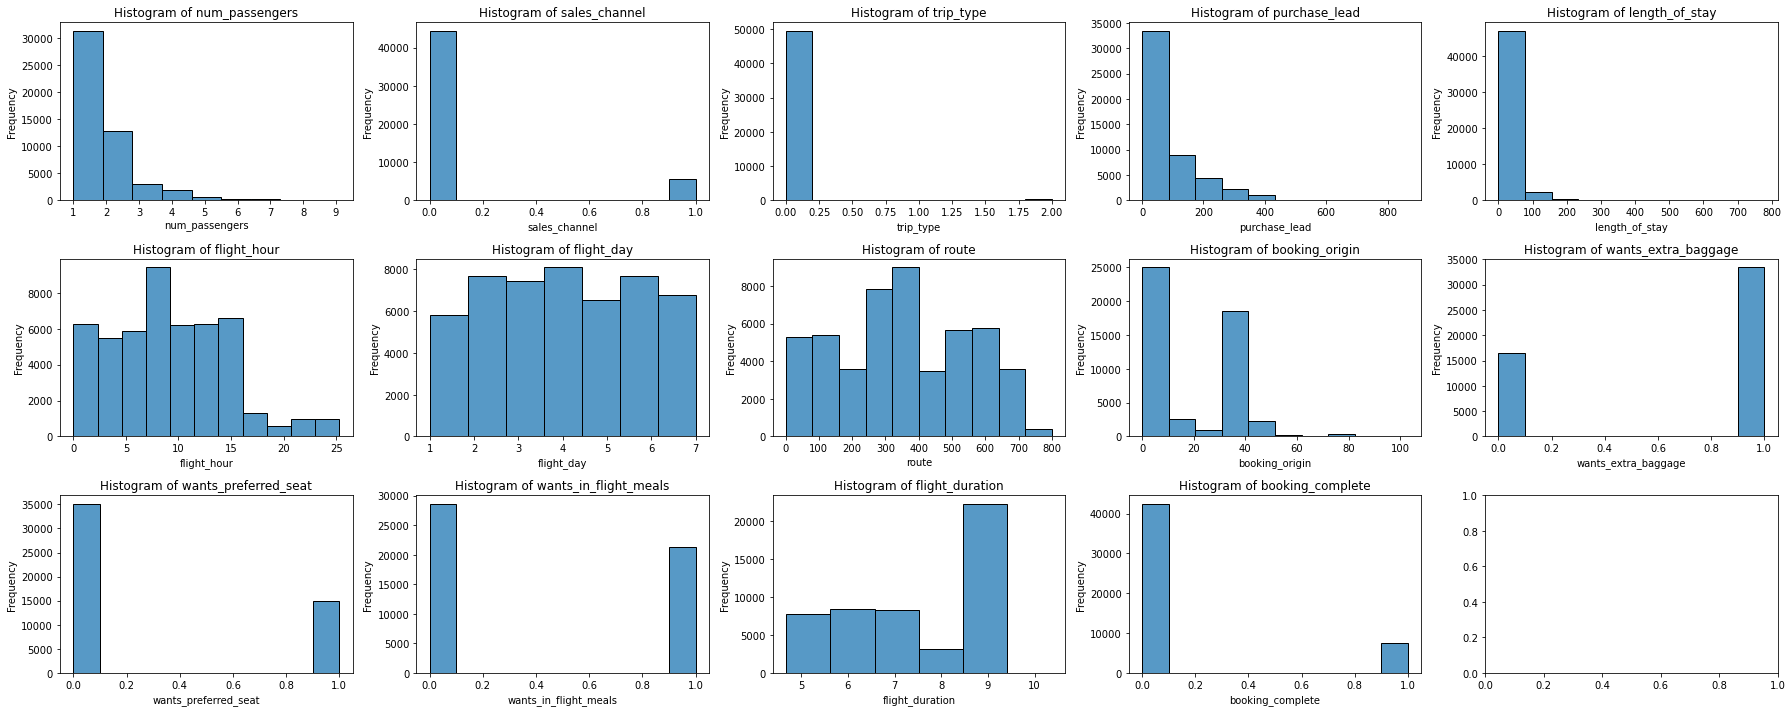

In [93]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Creating histograms for each column in the DataFrame
# fig, axes = plt.subplots(nrows=len(df.columns) // 2 + len(df.columns) % 2, ncols=5, figsize=(14, 20))
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(25, 10))
axes = axes.flatten()

for i, column in enumerate(df.columns):
    if df[column].dtype != 'object':
        if column == 'flight_day':
            sns.histplot(df[column], ax=axes[i], bins=7, kde=False)
            axes[i].set_title(f'Histogram of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
        else:    
            sns.histplot(df[column], ax=axes[i], binwidth=(df[column].max() / 10), kde=False)
            axes[i].set_title(f'Histogram of {column}')
            axes[i].set_xlabel(column)
            axes[i].set_ylabel('Frequency')
    else:
        # Removing the axis for non-numeric columns
        axes[i].axis('off')

# Adjusting the layout
plt.tight_layout()

# save the figure
plt.savefig('./images/histogram.png')

plt.show()


In [27]:
for column in df2.columns:
    print(df2[column].value_counts())
    print()

1    31352
2    12804
3     2941
4     1784
5      561
6      289
7      114
8       89
9       66
Name: num_passengers, dtype: int64

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

1      685
2      670
6      653
7      638
5      615
      ... 
641      1
471      1
614      1
463      1
867      1
Name: purchase_lead, Length: 470, dtype: int64

6      7757
5      7286
4      5655
3      2839
17     1849
       ... 
226       1
778       1
610       1
308       1
356       1
Name: length_of_stay, Length: 335, dtype: int64

8     3165
12    3163
9     3132
7     3126
11    3110
13    3101
10    3085
6     3050
5     2851
4     2843
14    2833
3     2655
2     2642
15    2234
1     2089
16    1557
0     1539
23     986
17     861
22     579
18     439
21     389
19     295
20     276
Name: flight_hour, dtype: int64

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6

In [28]:
print(df2['trip_type'].value_counts())

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64


In [29]:
df.corr()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,-0.002457,-0.002398,0.212606,-0.115850,0.015607,-0.007096,-0.039191,-0.128836,0.120404,0.028544,0.022943,-0.063169,0.024116
sales_channel,-0.002457,1.000000,-0.020929,-0.013399,-0.060352,0.022375,-0.000780,-0.013403,-0.060382,-0.054254,0.032943,-0.022235,-0.038629,-0.041060
trip_type,-0.002398,-0.020929,1.000000,0.007691,-0.011779,0.003194,0.004133,0.011905,0.008017,0.010716,-0.007786,-0.014732,0.043418,-0.027215
purchase_lead,0.212606,-0.013399,0.007691,1.000000,-0.076560,0.035973,0.011917,-0.104828,-0.077272,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.060352,-0.011779,-0.076560,1.000000,-0.024872,0.000791,-0.004616,0.112914,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.022375,0.003194,0.035973,-0.024872,1.000000,0.000455,-0.016650,-0.015756,-0.011434,0.012171,0.013014,-0.002101,0.007127
flight_day,-0.007096,-0.000780,0.004133,0.011917,0.000791,0.000455,1.000000,-0.010172,-0.003214,-0.003761,-0.009210,-0.001845,-0.001400,-0.010699
route,-0.039191,-0.013403,0.011905,-0.104828,-0.004616,-0.016650,-0.010172,1.000000,0.195515,0.022008,0.012699,-0.014119,-0.150993,-0.006529
booking_origin,-0.128836,-0.060382,0.008017,-0.077272,0.112914,-0.015756,-0.003214,0.195515,1.000000,0.051515,0.043292,0.085755,0.160598,-0.160146
wants_extra_baggage,0.120404,-0.054254,0.010716,-0.022207,0.176757,-0.011434,-0.003761,0.022008,0.051515,1.000000,0.207669,0.216470,0.057054,0.068139


<AxesSubplot:title={'center':'Correlation of features with one another'}>

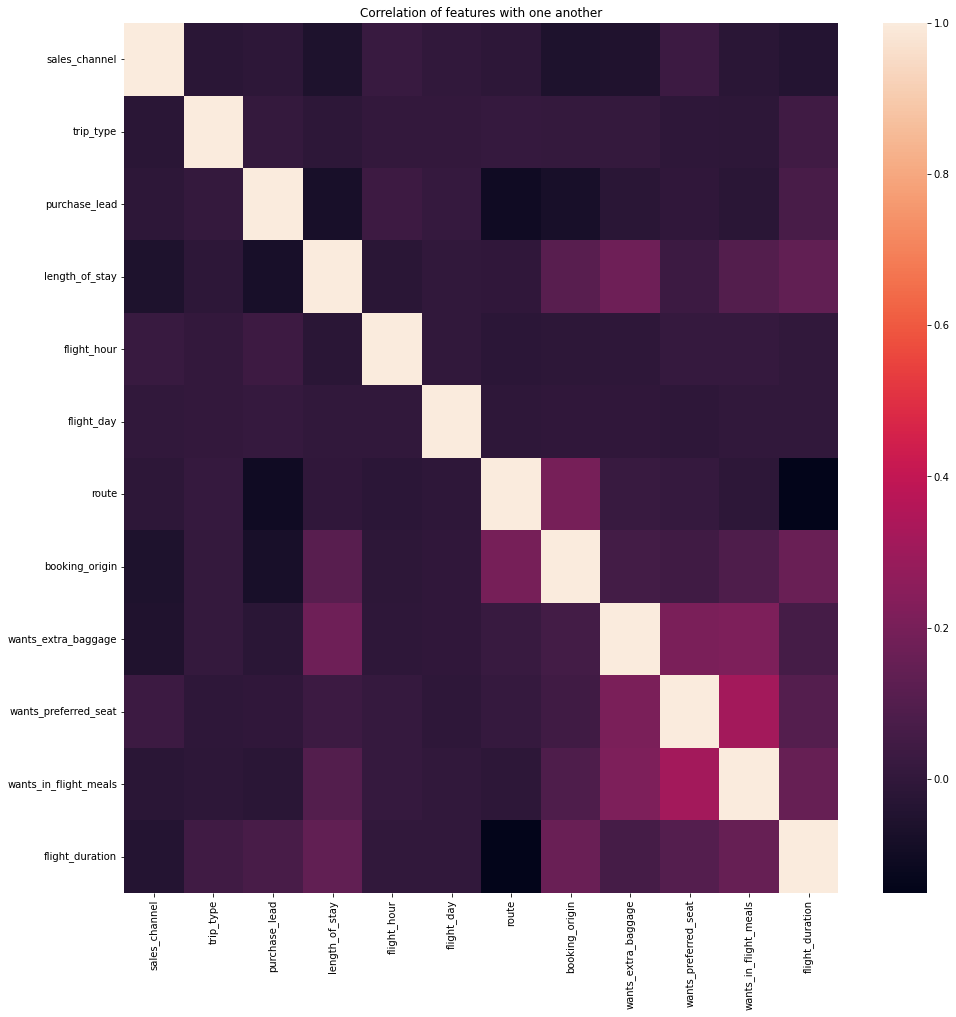

In [30]:
import seaborn as sns
%matplotlib inline

# calculate the correlation matrix on the numeric columns
corr_df = df.drop(labels = df.columns[-1], axis = 1)
corr_df = corr_df.drop(labels = corr_df.columns[0], axis = 1)
corr = corr_df.select_dtypes('number').corr()

plt.figure(figsize=(16,16))
plt.title('Correlation of features with one another')
# plot the heatmap
sns.heatmap(corr)

In [31]:
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

In [56]:
# The line of code below imports the Scaler
import copy
from sklearn.preprocessing import StandardScaler
    
def split_data(data):
    # Scaler is instantiated below
    scaler = StandardScaler()

    # The output categories are removed from the dataset below (W don't want to scale the output categories)
    features_df = data.drop(labels = ["booking_complete"], axis = 1)
    
    # Generate a fresh Scaled DF
    scaled_df = pd.DataFrame(scaler.fit_transform(features_df), 
                                   index=features_df.index, 
                                   columns=features_df.columns)

    # Replace the former DF with the fresh Scaled DF
    data = scaled_df.assign(booking_complete = data['booking_complete'])

    ### Splitting the Data
    # Separate the data into X and y variables
    X = data.drop(labels = ["booking_complete"], axis = 1)
    y = data.booking_complete

    # Create training and testing sets using the default splitting ratios
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    
    return X_train, X_test, y_train, y_test

X = df.drop(labels = ["booking_complete"], axis = 1)
y = df.booking_complete

In [57]:
X_train, X_test, y_train, y_test = split_data(df)

In [58]:
# Fitting and training the dummy
dummy = DummyClassifier(strategy='stratified')
dummy.fit(X_train, y_train)

# Dummy predictions
dummy_pred = dummy.predict(X_test)

#Printing out results
report = classification_report(y_test, dummy_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85     10651
           1       0.15      0.16      0.16      1849

    accuracy                           0.74     12500
   macro avg       0.50      0.50      0.50     12500
weighted avg       0.75      0.74      0.75     12500



In [59]:
import numpy as np

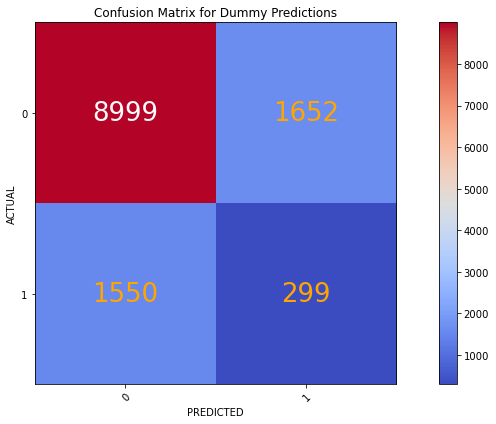

In [60]:

def plot_confusion_matrix(y_true, y_pred, labels=[0, 1], 
                          normalize=False, title=None, cmap=plt.cm.coolwarm):
    """
    Creates a more visually appealing confusion matrix
    """

    cm = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(12,6))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=labels, yticklabels=labels,
           title=title,
           ylabel='ACTUAL',
           xlabel='PREDICTED')
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 1.5
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="snow" if cm[i, j] > thresh else "orange",
                    size=26)
    ax.grid(False)
    fig.tight_layout()
    return ax

# Visualizing the confusion matrix using the function above
# The line immediately below stops the deprecation warning
plt.rcParams['axes.grid'] = False
plot_confusion_matrix(y_test, dummy_pred, title="Confusion Matrix for Dummy Predictions")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.84      0.85     10651
           1       0.15      0.16      0.16      1849

    accuracy                           0.74     12500
   macro avg       0.50      0.50      0.50     12500
weighted avg       0.75      0.74      0.75     12500



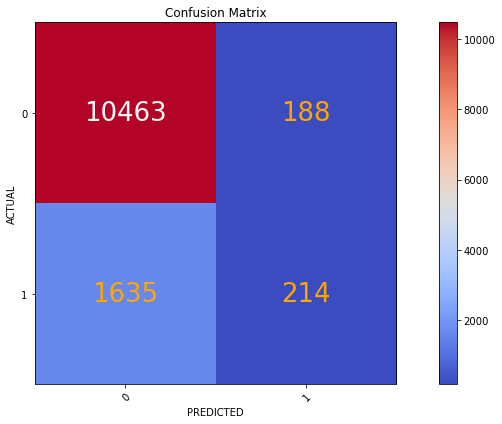

In [61]:
## Fitting and Training
# Importing the model (this is the line that would change for each model)
from sklearn.ensemble import RandomForestClassifier

# Instantiating the model (also change this line)
rf = RandomForestClassifier()

# Fitting the model
rf.fit(X_train, y_train)

### Printing out evaluation metrics
# Classifier predictions
y_pred = rf.predict(X_test)

#Printing out results
RF_report = classification_report(y_test, y_pred)
print(report)
  
### Running the Confusion Matrix
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

In [63]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold

"""
# Parameters to Tune
params = {
    'n_estimators': [1000, 2000],
    'max_depth': [None, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}
"""

params = {'n_estimators': [50, 100, 200, 500],
          }

# Instantiating GridSearch with the parameters set above
RF_search = GridSearchCV(rf, params, cv=2, return_train_score=True, verbose=5, scoring='f1_macro')

# Fitting the model to our dataset
RF_search.fit(X_train,y_train)

# Printing out the evaluations for our model which is different than the classification reports
print("Mean Training Score:", np.mean(RF_search.cv_results_['mean_train_score']))
print("Mean Testing Score:", RF_search.score(X, y))
print("\nBest Parameter Found:")
RF_search.best_params_

# Using the model with the best parameters and fitting it to the training sets to finally test it
best_RF_model = RF_search.best_estimator_

# copy best model from here
best_RF_model.fit(X_train, y_train)

# Classifier predictions from the tuned model
y_pred = best_RF_model.predict(X_test)



Fitting 2 folds for each of 4 candidates, totalling 8 fits
[CV 1/2] END n_estimators=50;, score=(train=0.999, test=0.540) total time=   1.2s
[CV 2/2] END n_estimators=50;, score=(train=0.998, test=0.532) total time=   1.1s
[CV 1/2] END n_estimators=100;, score=(train=1.000, test=0.537) total time=   2.0s
[CV 2/2] END n_estimators=100;, score=(train=1.000, test=0.532) total time=   1.9s
[CV 1/2] END n_estimators=200;, score=(train=1.000, test=0.534) total time=   4.3s
[CV 2/2] END n_estimators=200;, score=(train=1.000, test=0.528) total time=   4.3s
[CV 1/2] END n_estimators=500;, score=(train=1.000, test=0.537) total time=  11.0s
[CV 2/2] END n_estimators=500;, score=(train=1.000, test=0.530) total time=  10.3s
Mean Training Score: 0.9996989820747519
Mean Testing Score: 0.47110417660706017

Best Parameter Found:


In [55]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
best_params = RF_search.best_params_

print(classification_rep)

print(best_params)

              precision    recall  f1-score   support

           0       0.86      0.99      0.92     10672
           1       0.49      0.05      0.09      1828

    accuracy                           0.85     12500
   macro avg       0.68      0.52      0.51     12500
weighted avg       0.81      0.85      0.80     12500

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 2000}


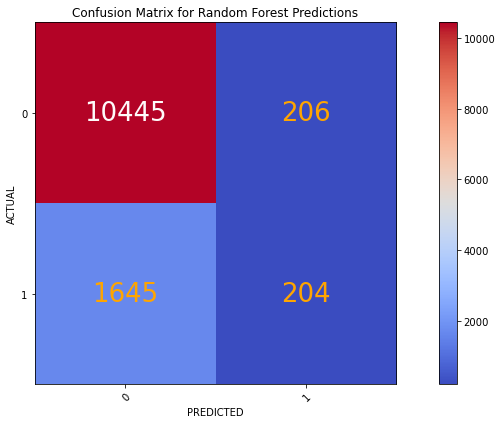

In [64]:
# Visualizing the confusion matrix using the function above
# The line immediately below stops the deprecation warning
plt.rcParams['axes.grid'] = False
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix for Random Forest Predictions")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

In [66]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import xgboost as xgb

# Pre-processing: Convert categorical columns to numeric using LabelEncoder
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])
        

# Set hyperparameters for tuning
params_gbm = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [30, 50],
    'min_samples_split': [2, 3],
    'min_samples_leaf': [1, 2],
    'subsample': [0.8, 1.0]
}

# Initialize the GradientBoosting classifier
gbm = GradientBoostingClassifier(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search_gbm = GridSearchCV(gbm, param_grid=params_gbm, return_train_score=True, cv=3, n_jobs=-1, verbose=1)
grid_search_gbm.fit(X_train, y_train)


grid_search_gbm.best_params_

# Using the model with the best parameters and fitting it to the training sets to finally test it
best_RF_model = grid_search_gbm.best_estimator_

# copy best model from here
best_RF_model.fit(X_train, y_train)

# Classifier predictions from the tuned model
y_pred = best_RF_model.predict(X_test)


Fitting 3 folds for each of 64 candidates, totalling 192 fits


In [67]:
# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
best_params = grid_search_gbm.best_params_

print(classification_rep)

print(best_params)

              precision    recall  f1-score   support

           0       0.86      1.00      0.92     10651
           1       0.64      0.05      0.08      1849

    accuracy                           0.86     12500
   macro avg       0.75      0.52      0.50     12500
weighted avg       0.83      0.86      0.80     12500

{'learning_rate': 0.01, 'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}


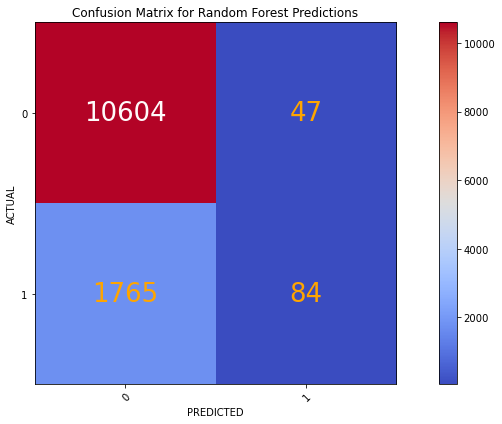

In [68]:
# Visualizing the confusion matrix using the function above
# The line immediately below stops the deprecation warning
plt.rcParams['axes.grid'] = False
plot_confusion_matrix(y_test, y_pred, title="Confusion Matrix for Random Forest Predictions")
np.set_printoptions(precision=1)
# Plot non-normalized confusion matrix
plt.show()

### Feature Importance

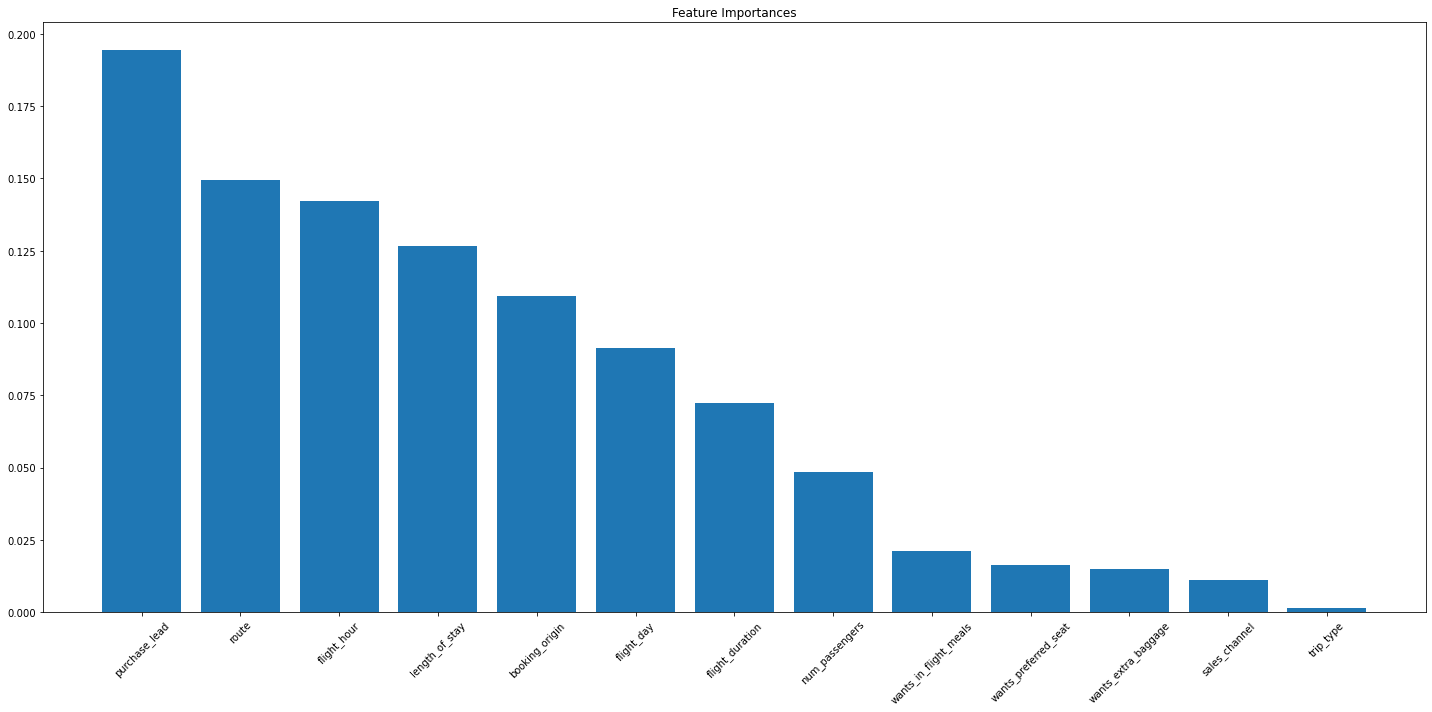

In [87]:
# Re-importing necessary libraries and re-preprocessing the data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to numeric using LabelEncoder
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])

# Split the data into features and target
X_fi = df.drop('booking_complete', axis=1)
y_fi = df['booking_complete']

# Train the Random Forest Classifier
rf_fi = RandomForestClassifier(random_state=42)
rf_fi.fit(X_fi, y_fi)

# Get feature importances and sort them
importances = rf_fi.feature_importances_
indices = np.argsort(importances)[::-1]
feature_names = X_fi.columns.tolist()

# Plotting the feature importances
plt.figure(figsize=(20, 10))
plt.title("Feature Importances")
plt.bar(range(X_fi.shape[1]), importances[indices], align="center")
plt.xticks(range(X_fi.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlim([-1, X_fi.shape[1]])
plt.tight_layout()

#save the figure
plt.savefig('./feature_importance.png')

plt.show()
